# Case study 1: Wine quality

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Datasets
- we have 2 datasets, red-wine dataset and white-wine dataset
- each dataset contains the quality ratings from 1-10, as well as different chemical properties of the wines

In [2]:
red_df = pd.read_csv("winequality-red.csv",sep=";")
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
white_df = pd.read_csv("winequality-white.csv",sep=";")
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 1- asking questions
- we already have the data so we need to ask questions about it

Questions we might ask about the wine quality datasets
- what are the distributions of the features?
- what attributes affect the quality the most? 
- calculate the feature values associated with each quality rating
- is a certain type of wine associated with higher quality?
-  What level of acidity (pH value) receives the highest average rating?
- Do wines with higher alcoholic content receive better ratings?
- Do sweeter wines (more residual sugar) receive better ratings?

## 2- Data wrangling

### 2.1- Gathering data
we already have the data and all we need is to just open it (already done above)

### 2.2- Assessing data

#### number of sampels

In [4]:
red_df.shape, white_df.shape

((1599, 12), (4898, 12))

There are more white wine data than red wine data

#### Features in the datasets

In [5]:
red_features = set(red_df.columns.to_list())
red_features

{'alcohol',
 'chlorides',
 'citric acid',
 'density',
 'fixed acidity',
 'free sulfur dioxide',
 'pH',
 'quality',
 'residual sugar',
 'sulphates',
 'total sulfur dioxide',
 'volatile acidity'}

In [6]:
white_features = set(white_df.columns.to_list())
white_features

{'alcohol',
 'chlorides',
 'citric acid',
 'density',
 'fixed acidity',
 'free sulfur dioxide',
 'pH',
 'quality',
 'residual sugar',
 'sulphates',
 'total sulfur dioxide',
 'volatile acidity'}

In [7]:
red_features - white_features

set()

In [8]:
white_features - red_features

set()

In [9]:
del white_features, red_features

Both of them have the same features

In [10]:
for i, feature in enumerate(white_df.columns):
    print(i+1, feature)

1 fixed acidity
2 volatile acidity
3 citric acid
4 residual sugar
5 chlorides
6 free sulfur dioxide
7 total sulfur dioxide
8 density
9 pH
10 sulphates
11 alcohol
12 quality


we have 11 features as well as the quality rating

#### Null values 

In [11]:
white_df.isnull().sum(axis=0)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
red_df.isnull().sum(axis = 0)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

we don't have any null values in the dataset

#### incorrect datatypes

In [13]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


- all datatypes seem reasonable

#### numerical statistics and incorrect data ranges

In [15]:
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
white_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


- mine: all the features' ranges seem reasonable and comparable for both red and white wine, except that the maximum residual sugar in white wine is much larger than the maximum in red wine (is it normal or not)

#### number of unique values for each feature

In [17]:
red_df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [18]:
white_df.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

#### number of duplicates

In [19]:
sum(red_df.duplicated())

240

In [20]:
sum(white_df.duplicated())

937

- we have large number of duplicates in both datasets!!
    - it is not necessary to remove them, but we need to keep that in mind when we are doing our analysis

### 2.3- Cleaning data
- we just need to combine the two datasets together in a single dataset
- we will add a new feature to distinguish between red and white wine before we combine them

In [21]:
red_df["color"] = "red"
white_df["color"] = "white"

In [27]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [25]:
wine_df = pd.concat([red_df,white_df])
wine_df.shape

(6497, 13)

In [26]:
wine_df.shape[0] == red_df.shape[0] + white_df.shape[0]

True

In [31]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [ ]:
wine_df.to_csv("winequality-combined.csv",index=False)

## 3- Exploratory data analysis

In [3]:
wine_df = pd.read_csv("winequality-combined.csv")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### Q1: what are the distributions of the features?
- we can see the distributions of the features in the dataset using histograms

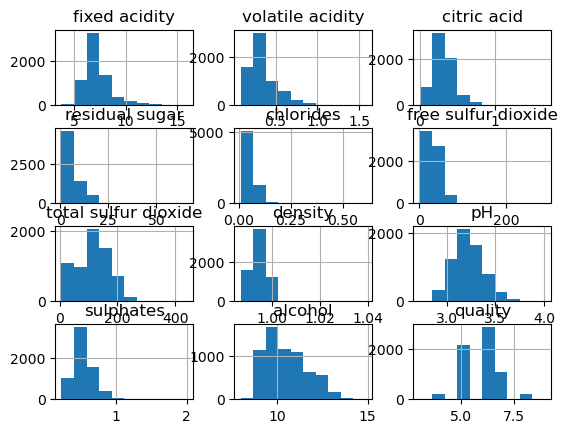

In [4]:
wine_df.hist();

<Axes: >

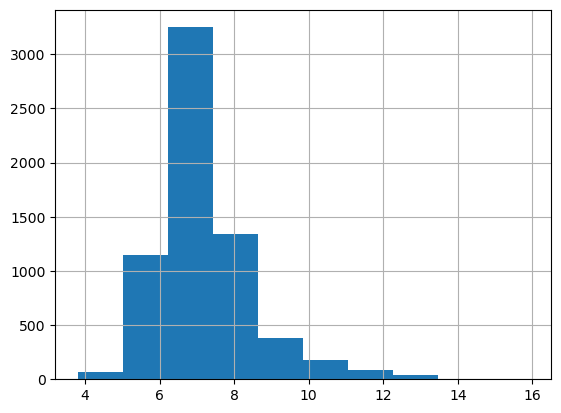

In [5]:
wine_df["fixed acidity"].hist()

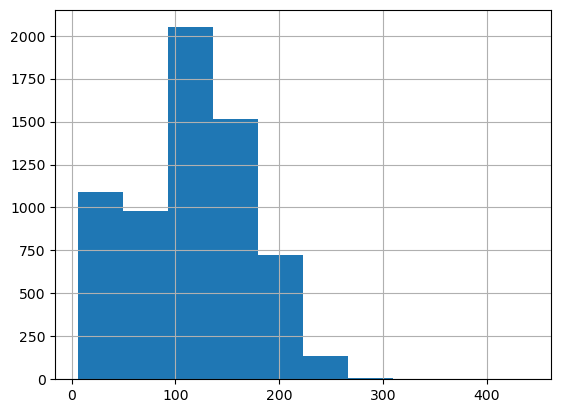

In [6]:
wine_df["total sulfur dioxide"].hist();

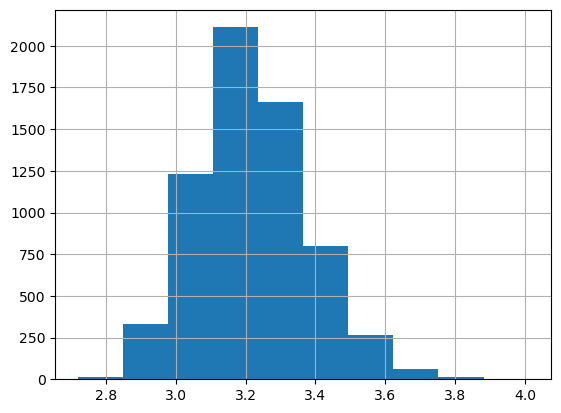

In [7]:
wine_df["pH"].hist();

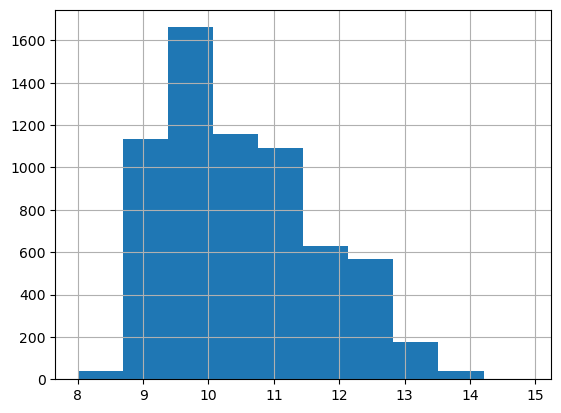

In [8]:
wine_df["alcohol"].hist();

- A: we see that alcohol and fixed acidity are skewed to the right (that means that the mean is greater than the median), PH is normally distributed

### Q2: what attributes affect the quality the most?
- we can see the correlation between the quality and the other features in the dataset using scatter plots or heatmaps

In [10]:
for i, column in enumerate(wine_df.columns):
    print(i+1, column)

1 fixed acidity
2 volatile acidity
3 citric acid
4 residual sugar
5 chlorides
6 free sulfur dioxide
7 total sulfur dioxide
8 density
9 pH
10 sulphates
11 alcohol
12 quality
13 color


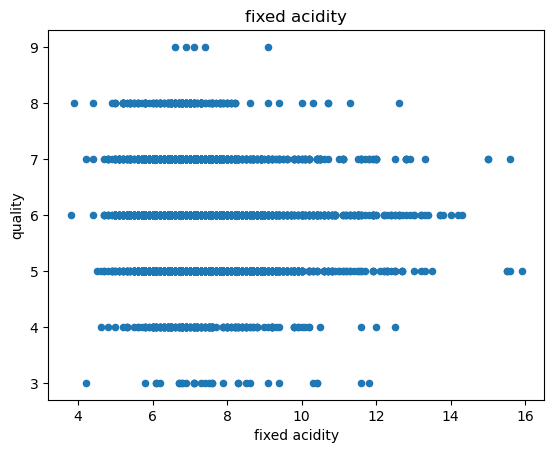

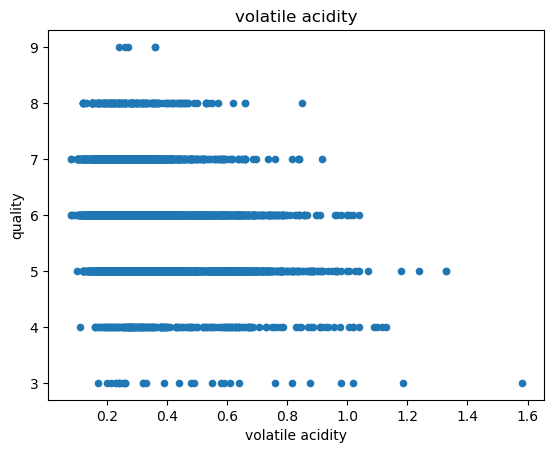

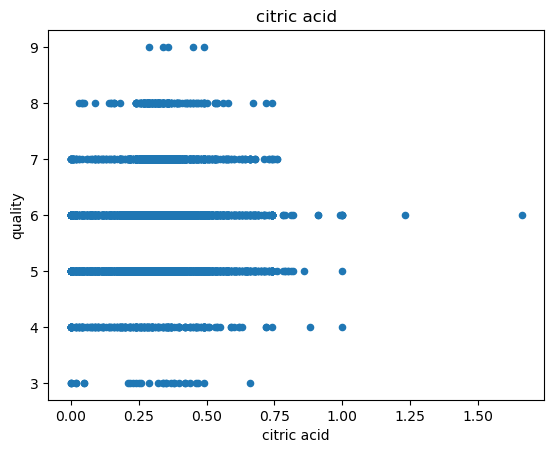

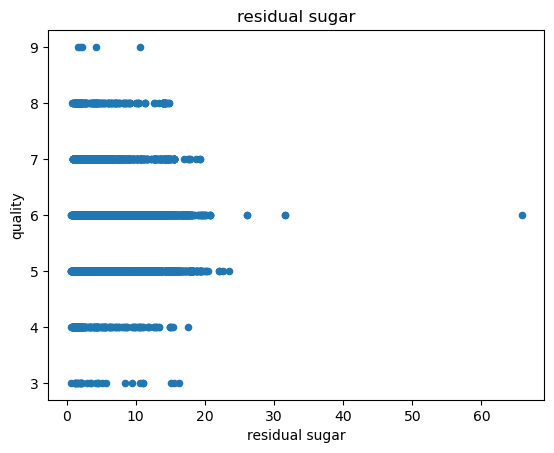

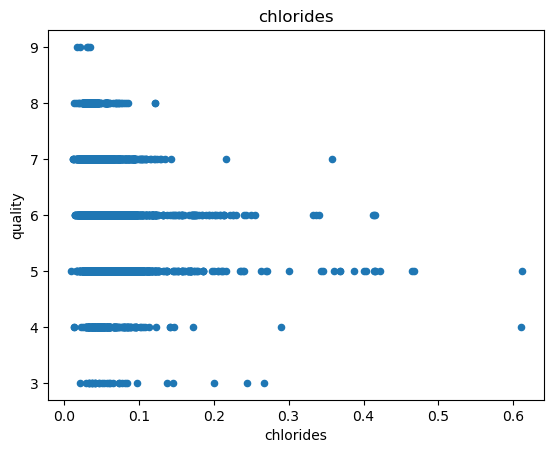

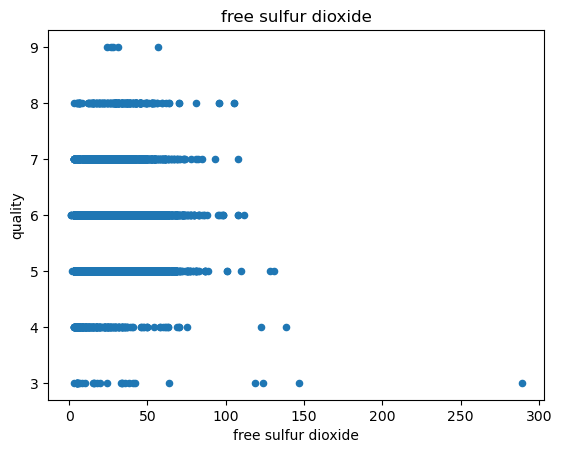

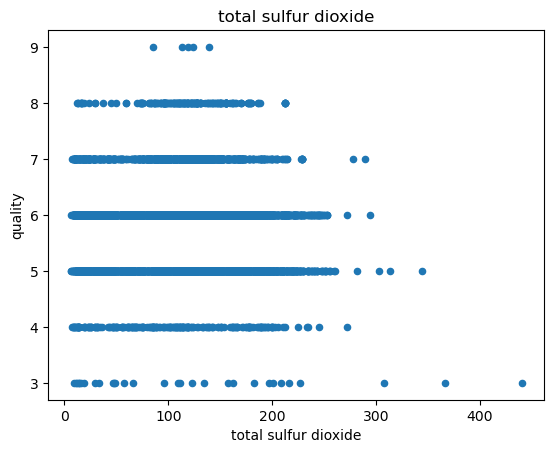

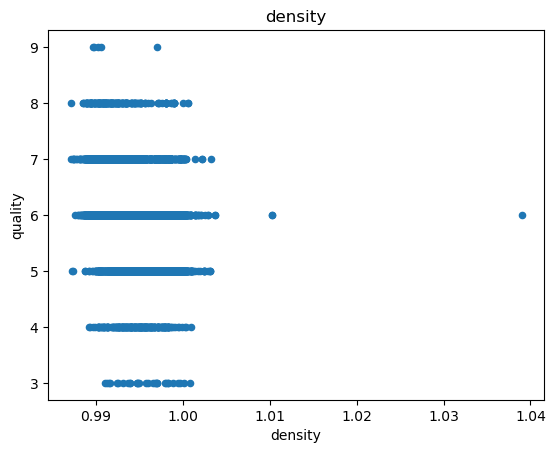

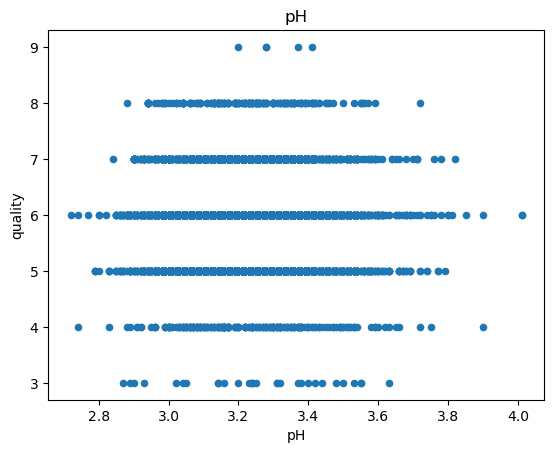

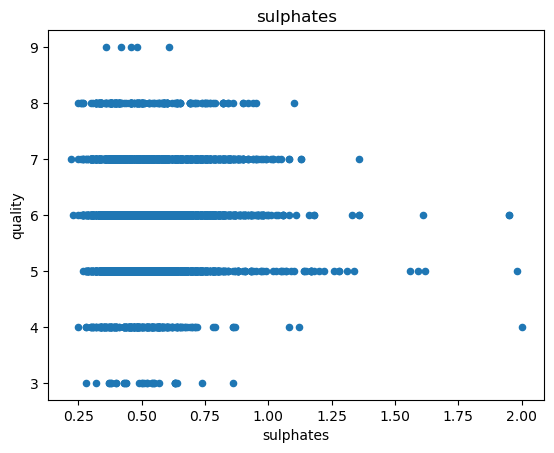

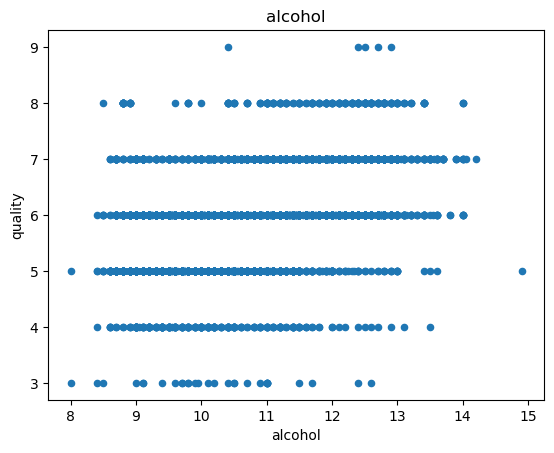

In [11]:
# loop through the columns and plot a scatter plot of each feature with the quality
for i, column in enumerate(wine_df.columns):
    if column == "quality" or column == "color":
        continue
    wine_df.plot.scatter(x=column, y="quality", title=column)

A: alcohol seem to be the most likely to have a positive impact on the quality of the wine, it is positively correlated with the quality as we see above

### Q3: calculate the feature values associated with each quality rating
- `df.groupby` let us group our data by some criteria and then **aggregate** some information about each group or perform **group-specific** transformations
    - we will use pandas `groupby` to group the data by a certain criteria `quality ratings` then calculate the summary statistics for each group
        - previously we calculted these summary statistics on the whole dataset but now we calculate them for each group resulted from `groupby` method
    
- mine: we have mentioned earlier that we could split the data into different dataframes based on some criteria and calculate some information about each dataframe, but use `groupby` whenever possible 

#### What is the mean PH for each quality rating?

In [7]:
# the mean PH for the whole dataset
wine_df["pH"].mean()

3.2185008465445586

In [13]:
# the mean PH for each quality rating
wine_df.groupby("quality")["pH"].mean()

quality
3    3.257667
4    3.231620
5    3.212189
6    3.217726
7    3.228072
8    3.223212
9    3.308000
Name: pH, dtype: float64

- as we see above, we divided the dataset into different groups based on the quality rating (each group contains the data with the same quality rating) then we accessed the PH column of each group and calculated the mean of it

#### Calculate the mean of each feature for each quality rating

In [17]:
wine_df.select_dtypes(include=[np.number]).groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


- in here we calculated the mean for everything not just the PH column
- notice how we selected the numerical columns only using `select_dtypes(include=[np.number])`

#### Calculate the mean of each feature for each quality rating for red and white wine separately
- we will do that by grouping the data by color to separate the red and white wine data then further split by quality rating

In [20]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [6]:
means_per_quality = wine_df.groupby(["color","quality"]).mean()
means_per_quality

fixed acidity  volatile acidity  citric acid  residual sugar  \
color quality                                                                 
red   3             8.360000          0.884500     0.171000        2.635000   
      4             7.779245          0.693962     0.174151        2.694340   
      5             8.167254          0.577041     0.243686        2.528855   
      6             8.347179          0.497484     0.273824        2.477194   
      7             8.872362          0.403920     0.375176        2.720603   
      8             8.566667          0.423333     0.391111        2.577778   
white 3             7.600000          0.333250     0.336000        6.392500   
      4             7.129448          0.381227     0.304233        4.628221   
      5             6.933974          0.302011     0.337653        7.334969   
      6             6.837671          0.260564     0.338025        6.441606   
      7             6.734716          0.262767     0.325625        5.186477   
      8             6.657143          0.277400     0.326514        5.671429   
      9             7.420000          0.298000     0.386000        4.120000   

               chlorides  free sulfur dioxide  total sulfur dioxide   density  \
color quality                                                                   
red   3         0.122500            11.000000             24.900000  0.997464   
      4         0.090679            12.264151             36.245283  0.996542   
      5         0.092736            16.983847             56.513950  0.997104   
      6         0.084956            15.711599             40.869906  0.996615   
      7         0.076588            14.045226             35.020101  0.996104   
      8         0.068444            13.277778             33.444444  0.995212   
white 3         0.054300            53.325000            170.600000  0.994884   
      4         0.050098            23.358896            125.279141  0.994277   
      5         0.051546            36.432052            150.904598  0.995263   
      6         0.045217            35.650591            137.047316  0.993961   
      7         0.038191            34.125568            125.114773  0.992452   
      8         0.038314            36.720000            126.165714  0.992236   
      9         0.027400            33.400000            116.000000  0.991460   

                     pH  sulphates    alcohol  
color quality                                  
red   3        3.398000   0.570000   9.955000  
      4        3.381509   0.596415  10.265094  
      5        3.304949   0.620969   9.899706  
      6        3.318072   0.675329  10.629519  
      7        3.290754   0.741256  11.465913  
      8        3.267222   0.767778  12.094444  
white 3        3.187500   0.474500  10.345000  
      4        3.182883   0.476135  10.152454  
      5        3.168833   0.482203   9.808840  
      6        3.188599   0.491106  10.575372  
      7        3.213898   0.503102  11.367936  
      8        3.218686   0.486229  11.636000  
      9        3.308000   0.466000  12.180000

In [7]:
# we can access anything in the result above as color and quality are now labbeled indices
means_per_quality.loc["red"].loc[3]

fixed acidity            8.360000
volatile acidity         0.884500
citric acid              0.171000
residual sugar           2.635000
chlorides                0.122500
free sulfur dioxide     11.000000
total sulfur dioxide    24.900000
density                  0.997464
pH                       3.398000
sulphates                0.570000
alcohol                  9.955000
Name: 3, dtype: float64

In [38]:
result.loc["red"]["fixed acidity"]

quality
3    8.360000
4    7.779245
5    8.167254
6    8.347179
7    8.872362
8    8.566667
Name: fixed acidity, dtype: float64

In [39]:
# we can remove the indicies using as_index = False
wine_df.groupby(["color","quality"],as_index=False).mean()

,color,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,red,3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
1,red,4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
2,red,5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
3,red,6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
4,red,7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
5,red,8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444
6,white,3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
7,white,4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
8,white,5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
9,white,6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372


### Q4: is a certain type of wine associated with higher quality?
- we can calculate the mean quality rating for each type of wine

In [41]:
wine_df.groupby("color")["quality"].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

- mine: but notice that the mean isn't enough indicator (it is only a measure of center)
- we can plot the whole 5 number summary (i.e. min, Q1, median, Q3, max) for each type of wine to get a better understanding of the how the quality is distributed for each type of wine

In [79]:
red_qualities = wine_df[wine_df["color"] == "red"]["quality"] 
white_qualities = wine_df[wine_df["color"] == "white"]["quality"]

Text(0.5, 1.0, 'Quality by Wine Color')

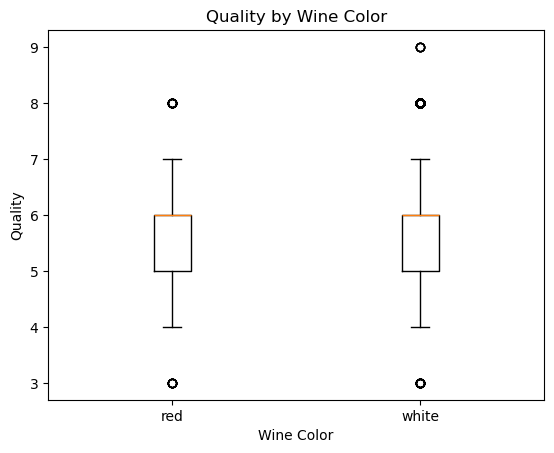

In [86]:
plt.boxplot([red_qualities,white_qualities],labels=["red","white"]);
plt.xlabel('Wine Color')
plt.ylabel('Quality')
plt.title('Quality by Wine Color')

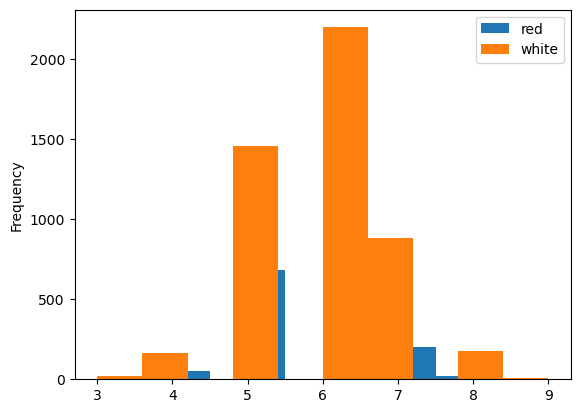

In [52]:
wine_df.groupby("color")["quality"].plot(kind="hist", legend=True);

- we see that the wrapper function in "pandas" aren't that good 

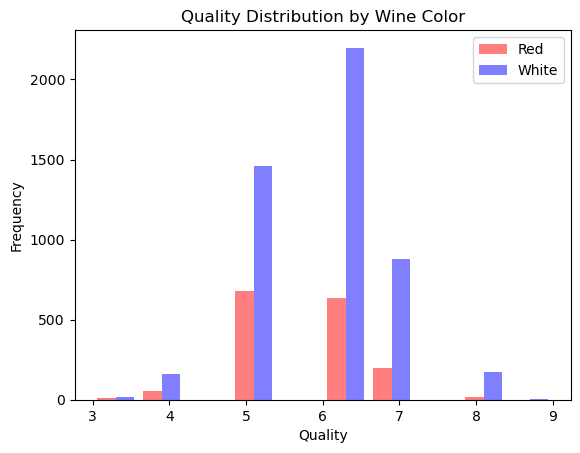

In [65]:
import matplotlib.pyplot as plt

plt.hist([red_qualities, white_qualities], color=['red', 'blue'], alpha=0.5, bins=10, label=['Red', 'White'])
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Quality Distribution by Wine Color')
plt.legend(loc='upper right')
plt.show()

- using matplotlib made it more customizable
- but notice that the the number of white wine data is much larger than the number of red wine data, so we need to take that into consideration when we are comparing the two types of wine
    - we can plot the relative frequency of each quality rating by dividing the count of each quality rating by the total number of data points in each type of wine

In [111]:
counts_per_quality = wine_df.groupby(["color","quality"]).count()["pH"]
counts_per_quality 

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [112]:
totals = wine_df.groupby("color")["fixed acidity"].count()
totals

color
red      1599
white    4898
Name: fixed acidity, dtype: int64

In [113]:
red_proportions = counts_per_quality["red"] / totals["red"]
white_proportions = counts_per_quality["white"] / totals["white"]

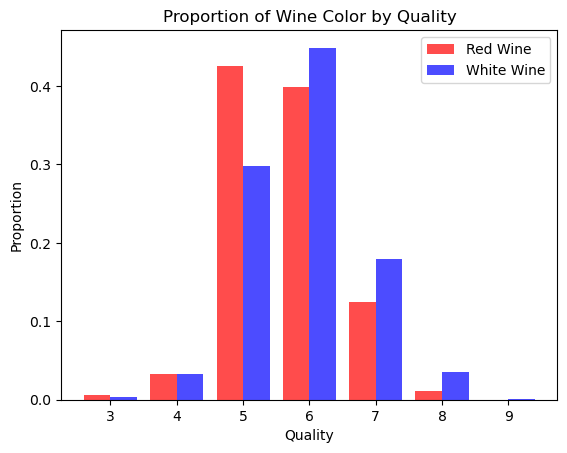

In [117]:
width = 0.4  # width of the bars

plt.bar(red_proportions.index - width/2, red_proportions, color='r', alpha=0.7, width=width, label='Red Wine')
plt.bar(white_proportions.index + width/2, white_proportions, color='b', alpha=0.7, width=width, label='White Wine')
plt.xlabel('Quality')
plt.ylabel('Proportion')
plt.title('Proportion of Wine Color by Quality')
plt.legend(loc='upper right')
plt.show()

### Q5: What level of acidity (pH value) receives the highest average rating?

- unlike color which was a categorical variable (so it was easy to group into red and white wine and see the quality distribution for each group), PH is a quantitative variable 

- we can split the quantitative variable into qualitative categories using `pd.cut` method
- pandas' cut function let's you "cut" data in groups. Using this, create a new column called acidity_levels with these categories:
    - High: Lowest 25% of pH values
    - Moderately High: 25% - 50% of pH values
    - Medium: 50% - 75% of pH values
    - Low: 75% - max pH value

In [133]:
wine_df["pH"].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

- we used describe to get the min, 25%, 50%, 75%, and max values of the PH column to use them in the `pd.cut` method

In [134]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72,3.11,3.21,3.32,4.01] # 5 numbers that constitute 4 groups
# Labels for the four acidity level groups
bin_names = ['high', 'Moderately_High', 'medium', 'low'] # Name each acidity level category

In [135]:
pd.cut(wine_df['pH'], bin_edges, labels=bin_names)

0                   low
1       Moderately_High
2                medium
3       Moderately_High
4                   low
             ...       
6492             medium
6493    Moderately_High
6494               high
6495                low
6496             medium
Name: pH, Length: 6497, dtype: category
Categories (4, object): ['high' < 'Moderately_High' < 'medium' < 'low']

In [136]:
wine_df["acidity_levels"] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names)

- now we can group the data by the acidity levels and calculate the mean quality rating for each group or see its quality distribution instead of just the mean

In [141]:
mean_quality_per_acidity = wine_df.groupby('acidity_levels')["quality"].mean()
mean_quality_per_acidity

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_184\1796519904.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_quality_per_acidity = wine_df.groupby('acidity_levels')["quality"].mean()


acidity_levels
high               5.783343
Moderately_High    5.784540
medium             5.850832
low                5.859593
Name: quality, dtype: float64

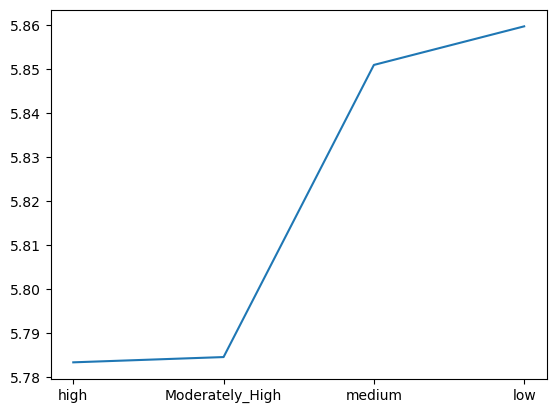

In [142]:
plt.plot(mean_quality_per_acidity)

- we see that `low` auciity level has the highest `average` quality rating
- since the numbers are very close, using bar chart would create bars that appear to be almost the same height, so we can use a line plot instead

### Q6: Do wines with higher alcoholic content receive better ratings?
- we could use the same approach of splitting alcohol into 4 categories based on the quartiles, but we will just split it into 2 categories (high and low) based on the median

In [105]:
wine_df["alcohol"].median()

10.3

In [145]:
low_alcohol = wine_df.query("alcohol < 10.3")
low_alcohol

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,Moderately_High
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,medium
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,Moderately_High
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6487,6.8,0.220,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5,white,high
6488,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6,white,high
6491,6.5,0.230,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5,white,medium
6493,6.6,0.320,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,Moderately_High


In [146]:
high_alcohol = wine_df.query("alcohol >= 10.3")
high_alcohol

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,red,low
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,red,low
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7,red,medium
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.99660,3.46,0.57,10.6,6,red,low
36,7.8,0.600,0.14,2.4,0.086,3.0,15.0,0.99750,3.42,0.60,10.8,6,red,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489,6.1,0.340,0.29,2.2,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6,white,high
6490,5.7,0.210,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6,white,medium
6492,6.2,0.210,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,medium
6495,5.5,0.290,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,low


In [147]:
low_alcohol["quality"].mean(), high_alcohol["quality"].mean()

(5.475920679886686, 6.146084337349397)

- we see that wines with higher alcoholic content receive better ratings (on `average`)
- notice how we used the split approach instead of grouping
    - we could use pd.cut to split the data into categories then group by these categories and calculate the mean quality rating for each group
- notice how we used a `query` method to filter the data based on a certain condition
    - it is the same as `mask` method but it is more readable
    - we could do `df[df['alcohol'] >= 10.3]` instead of `df.query('alcohol >= 10.3')`

### Q7: Do sweeter wines (more residual sugar) receive better ratings?

In [157]:
high_sugar = wine_df[wine_df["residual sugar"] >= wine_df["residual sugar"].median()]
high_sugar

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.50,5,red,low
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.50,5,red,low
14,8.9,0.620,0.18,3.80,0.176,52.0,145.0,0.99860,3.16,0.88,9.20,5,red,Moderately_High
15,8.9,0.620,0.19,3.90,0.170,51.0,148.0,0.99860,3.17,0.93,9.20,5,red,Moderately_High
18,7.4,0.590,0.08,4.40,0.086,6.0,29.0,0.99740,3.38,0.50,9.00,4,red,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6483,6.5,0.330,0.38,8.30,0.048,68.0,174.0,0.99492,3.14,0.50,9.60,5,white,Moderately_High
6484,6.6,0.340,0.40,8.10,0.046,68.0,170.0,0.99494,3.15,0.50,9.55,6,white,Moderately_High
6485,6.2,0.210,0.28,5.70,0.028,45.0,121.0,0.99168,3.21,1.08,12.15,7,white,Moderately_High
6488,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.40,6,white,high


In [158]:
low_sugar = wine_df[wine_df["residual sugar"] < wine_df["residual sugar"].median()]

In [159]:
high_sugar["quality"].mean(), low_sugar["quality"].mean()

(5.82782874617737, 5.808800743724822)

- we also notice that wines with higher residual sugar receive better ratings (on `average`)

In [127]:
wine_df.to_csv("winequality_combined_edited.csv",index=False)

## 4- Drawing conclusions

- this step was done with step 3 as after each code we write the conclusion of it

## 5- Communicating results

### Q: What attributes affect quality the most ?

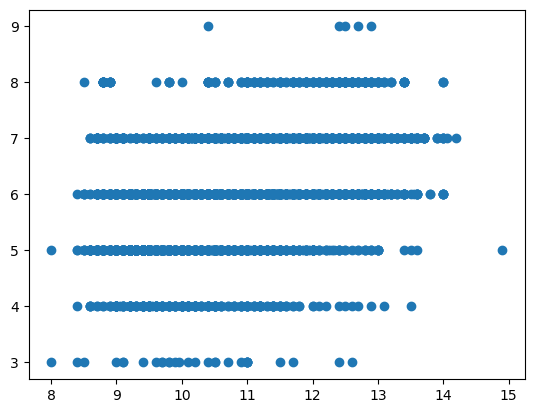

In [8]:
plt.scatter(x=wine_df["alcohol"],y=wine_df["quality"])
plt.show()

A: alcohol seem to be the most likely to have a positive impact on the quality of the wine, it is positively correlated with the quality as we see above

### Q: how are the features associated with each quality rating?

In [19]:
means_per_quality.loc["red"].index

Index([3, 4, 5, 6, 7, 8], dtype='int64', name='quality')

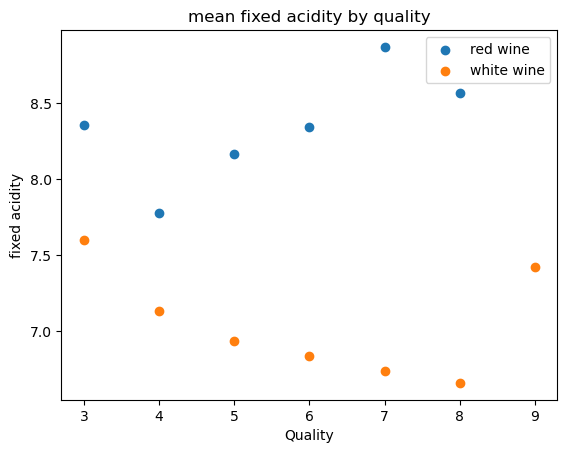

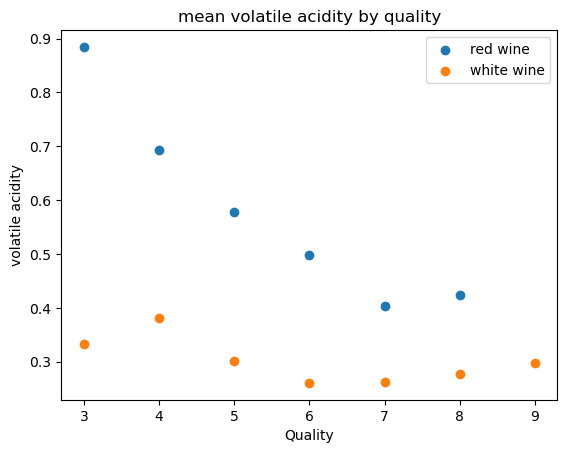

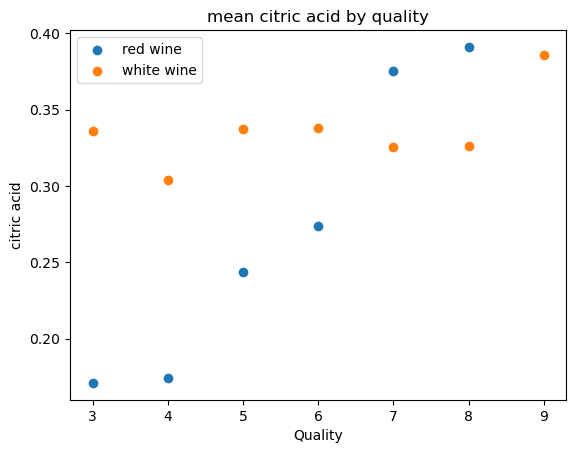

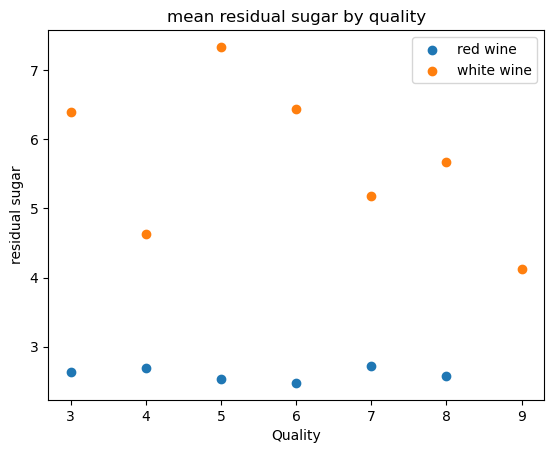

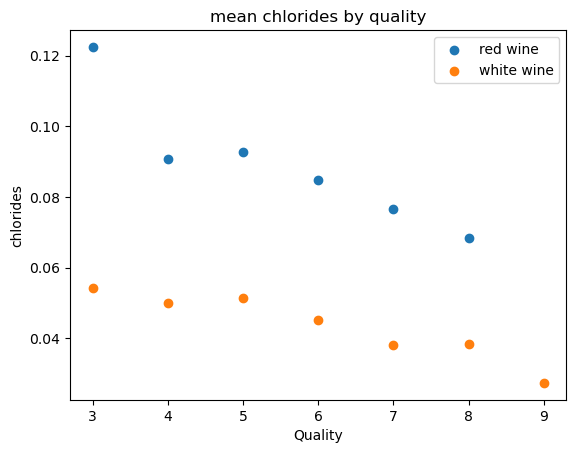

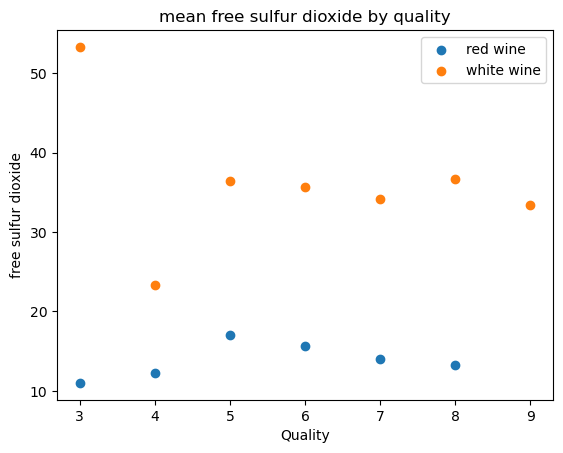

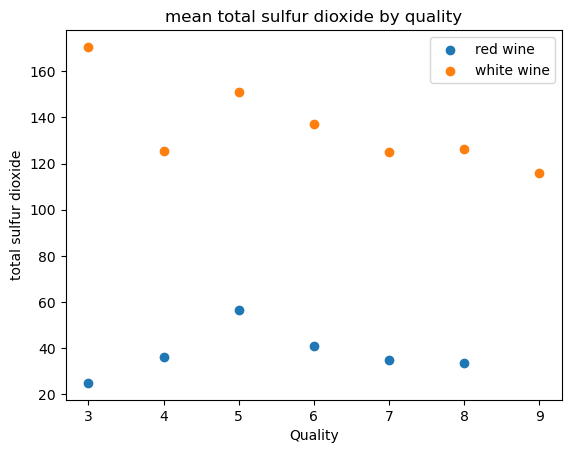

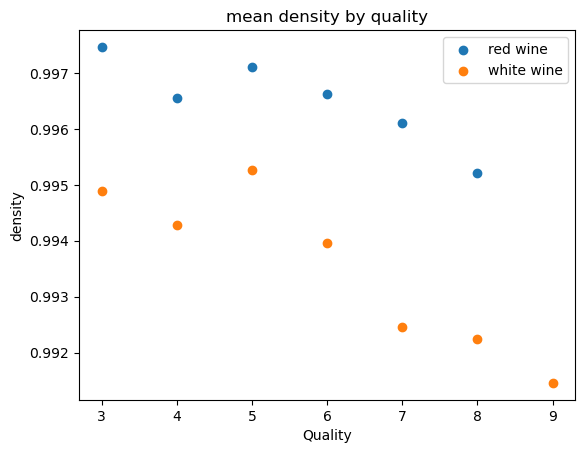

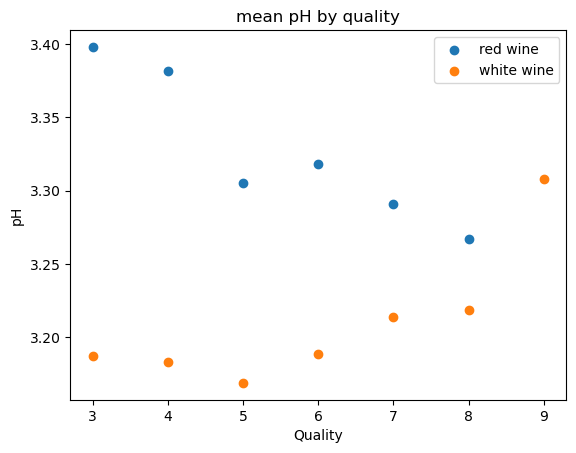

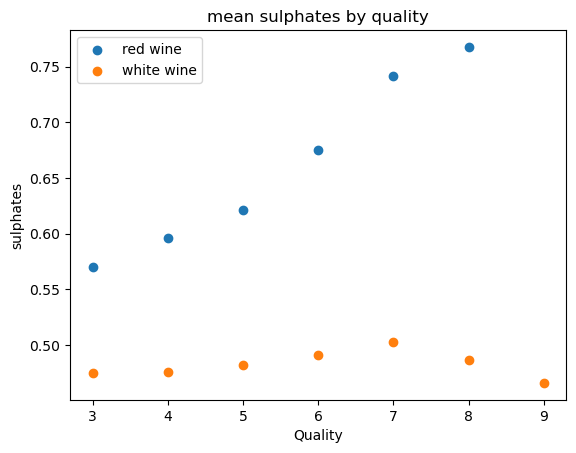

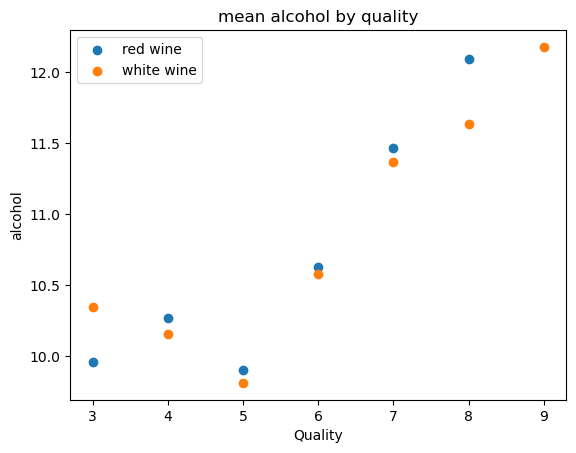

In [29]:
for column in means_per_quality.columns:
    # plot the means of that column for red wine 
    plt.scatter(x=means_per_quality.loc["red"].index,y=means_per_quality.loc["red"][column],label="red wine")
    # plot the means of that column for white wine on the same plot
    plt.scatter(x=means_per_quality.loc["white"].index,y=means_per_quality.loc["white"][column],label="white wine")
    plt.title("mean "+column+" by quality")
    plt.xlabel("Quality")
    plt.ylabel(column)
    plt.legend()
    plt.show()

### Q: is a certain type of wine associated with higher quality?

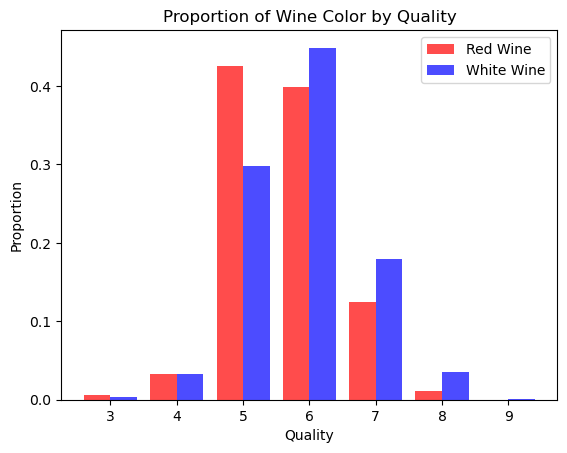

In [126]:
width = 0.4  # width of the bars

plt.bar(red_proportions.index - width/2, red_proportions, color='r', alpha=0.7, width=width, label='Red Wine')
plt.bar(white_proportions.index + width/2, white_proportions, color='b', alpha=0.7, width=width, label='White Wine')
plt.xlabel('Quality')
plt.ylabel('Proportion')
plt.title('Proportion of Wine Color by Quality')
plt.legend(loc='upper right')
plt.show()

- we see that for the lower ratings (3,4,5) red samples show higher proportion, as for the higher ratings (6,7,8,9) white samples show higher proportion

### Q: What level of acidity (pH value) receives the highest average rating?

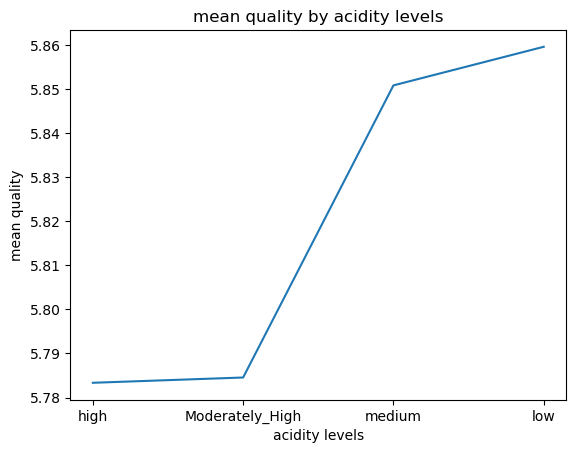

In [143]:
plt.plot(mean_quality_per_acidity)
plt.title("mean quality by acidity levels")
plt.xlabel("acidity levels")
plt.ylabel("mean quality")
plt.show()

### Q: Do wines with higher alcoholic content receive better ratings?

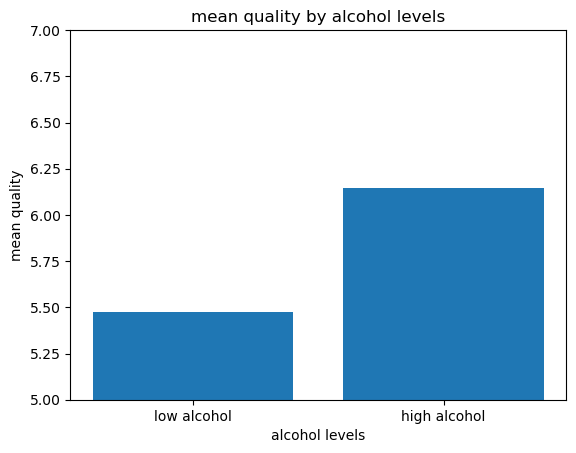

In [156]:
plt.bar(["low alcohol","high alcohol"],[low_alcohol["quality"].mean(),high_alcohol["quality"].mean()])
plt.xlabel("alcohol levels")
plt.ylabel("mean quality")
plt.title("mean quality by alcohol levels")
plt.ylim(5,7)
plt.show()

- we see that wines with higher alcoholic content receive better ratings (on `average`)

### Q: Do sweeter wines (more residual sugar) receive better ratings?

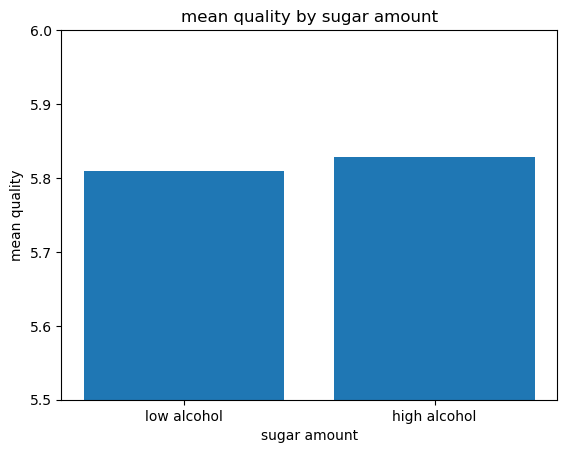

In [172]:
plt.bar(["low alcohol","high alcohol"],[low_sugar["quality"].mean(),high_sugar["quality"].mean()])
plt.xlabel("sugar amount")
plt.ylabel("mean quality")
plt.title("mean quality by sugar amount")
plt.ylim(5.5,6)
plt.show()

- we also notice that wines with higher residual sugar receive better ratings (on `average`)